##  PyTorch Fundamentals

### PyTorch Tensors

In [4]:
import torch

X = torch.tensor([[1.0, 7.0, 3.0],[4.0, 5.0, 6.0]])
X

tensor([[1., 7., 3.],
        [4., 5., 6.]])

In [5]:
X.shape

torch.Size([2, 3])

In [6]:
X.dtype

torch.float32

In [7]:
X[0, 2]

tensor(3.)

In [8]:
X[:, 2]

tensor([3., 6.])

In [9]:
10 * (X + 1)

tensor([[20., 80., 40.],
        [50., 60., 70.]])

In [10]:
X.exp()

tensor([[   2.7183, 1096.6332,   20.0855],
        [  54.5982,  148.4132,  403.4288]])

In [11]:
X.mean()

tensor(4.3333)

In [12]:
X.max(0)  

torch.return_types.max(
values=tensor([4., 7., 6.]),
indices=tensor([1, 0, 1]))

In [13]:
X.T

tensor([[1., 4.],
        [7., 5.],
        [3., 6.]])

In [14]:
X.T.shape

torch.Size([3, 2])

In [15]:
X @ X.T

tensor([[59., 57.],
        [57., 77.]])

In [16]:
import numpy as np

X.numpy()

array([[1., 7., 3.],
       [4., 5., 6.]], dtype=float32)

In [17]:
np.array([[1.0, 7.0, 3.0],[4.0, 5.0, 6.0]])

array([[1., 7., 3.],
       [4., 5., 6.]])

In [18]:
torch.tensor(np.array([[1.0, 7.0, 3.0],[4.0, 5.0, 6.0]]))

tensor([[1., 7., 3.],
        [4., 5., 6.]], dtype=torch.float64)

In [19]:
torch.tensor(np.array([[1.0, 7.0, 3.0],[4.0, 5.0, 6.0]]),dtype =torch.float32)

tensor([[1., 7., 3.],
        [4., 5., 6.]])

In [20]:
torch.FloatTensor(np.array([[1.0, 7.0, 3.0],[4.0, 5.0, 6.0]]))

tensor([[1., 7., 3.],
        [4., 5., 6.]])

In [21]:
X2_np = np.array([[1.0, 7.0, 3.0],[4.0, 5.0, 6.0]])
X2 = torch.from_numpy(X2_np)
X2_np[0,1] = 33
X2

tensor([[ 1., 33.,  3.],
        [ 4.,  5.,  6.]], dtype=torch.float64)

In [22]:
X[:,1] = -44
X

tensor([[  1., -44.,   3.],
        [  4., -44.,   6.]])

In [23]:
X.relu()

tensor([[1., 0., 3.],
        [4., 0., 6.]])

## Hardward Acceleration

In [25]:
if torch.cuda.is_available():
    device = "cuda"
elif torch.backends.mps.is_available():
    device = "mps"
else:
    device = "cpu"

In [26]:
device

'mps'

In [27]:
# First CPU → then GPU
M = torch.tensor([[1.0, 7.0, 3.0],[4.0, 5.0, 6.0]])
M = M.to(device)
M.device

device(type='mps', index=0)

In [28]:
# Direct GPU
M = torch.tensor([[1.0, 7.0, 3.0],[4.0, 5.0, 6.0]], device=device)
M.device

device(type='mps', index=0)

In [29]:
R = M @ M.T
R

tensor([[59., 57.],
        [57., 77.]], device='mps:0')

In [30]:
M = torch.rand((2000,2000))
M @ M.T # warmup
%timeit M @ M.T

M = M.to(device)
M @ M.T # warmup
%timeit M @ M.T

11.1 ms ± 408 μs per loop (mean ± std. dev. of 7 runs, 100 loops each)
11 ms ± 119 μs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


## Autograd

In [32]:
X = torch.tensor(4.0, requires_grad = True)
f = X ** 2
f

tensor(16., grad_fn=<PowBackward0>)

In [33]:
f.backward()
X.grad

tensor(8.)

In [34]:
learning_rate = 0.1
with torch.no_grad():
    X -= learning_rate * X.grad

In [35]:
X

tensor(3.2000, requires_grad=True)

In [36]:
X_detached = X.detach()
X_detached -= learning_rate * X.grad
X_detached

tensor(2.4000)

In [37]:
X.grad.zero_()   # resets gradients not value

tensor(0.)

In [38]:
X

tensor(2.4000, requires_grad=True)

In [39]:
learning_rate = 0.01
x = torch.tensor(4.0,requires_grad = True)
for iterations in range(50):
    f = x ** 2  # forward pass
    f.backward() # backward pass
    with torch.no_grad():
        x -= learning_rate * x.grad # gradient descent step
    x.grad.zero_()
    print(x )
    

tensor(3.9200, requires_grad=True)
tensor(3.8416, requires_grad=True)
tensor(3.7648, requires_grad=True)
tensor(3.6895, requires_grad=True)
tensor(3.6157, requires_grad=True)
tensor(3.5434, requires_grad=True)
tensor(3.4725, requires_grad=True)
tensor(3.4031, requires_grad=True)
tensor(3.3350, requires_grad=True)
tensor(3.2683, requires_grad=True)
tensor(3.2029, requires_grad=True)
tensor(3.1389, requires_grad=True)
tensor(3.0761, requires_grad=True)
tensor(3.0146, requires_grad=True)
tensor(2.9543, requires_grad=True)
tensor(2.8952, requires_grad=True)
tensor(2.8373, requires_grad=True)
tensor(2.7805, requires_grad=True)
tensor(2.7249, requires_grad=True)
tensor(2.6704, requires_grad=True)
tensor(2.6170, requires_grad=True)
tensor(2.5647, requires_grad=True)
tensor(2.5134, requires_grad=True)
tensor(2.4631, requires_grad=True)
tensor(2.4139, requires_grad=True)
tensor(2.3656, requires_grad=True)
tensor(2.3183, requires_grad=True)
tensor(2.2719, requires_grad=True)
tensor(2.2265, requi

## Implementation of Linear Regression

In [41]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split

housing = fetch_california_housing()
X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data,
                                                        housing.target, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full,y_train_full,
                                                     random_state=42)

In [42]:
X_train.dtype

dtype('float64')

In [43]:
X_train = torch.FloatTensor(X_train)
X_valid = torch.FloatTensor(X_valid)
X_test = torch.FloatTensor(X_test)

In [44]:
X_train.shape

torch.Size([11610, 8])

In [45]:
X_train.dtype

torch.float32

In [46]:
X_train[:4]

tensor([[ 3.5214e+00,  1.5000e+01,  3.0499e+00,  1.1065e+00,  1.4470e+03,
          1.6060e+00,  3.7630e+01, -1.2243e+02],
        [ 5.3275e+00,  5.0000e+00,  6.4901e+00,  9.9105e-01,  3.4640e+03,
          3.4433e+00,  3.3690e+01, -1.1739e+02],
        [ 3.1000e+00,  2.9000e+01,  7.5424e+00,  1.5915e+00,  1.3280e+03,
          2.2508e+00,  3.8440e+01, -1.2298e+02],
        [ 7.1736e+00,  1.2000e+01,  6.2890e+00,  9.9744e-01,  1.0540e+03,
          2.6957e+00,  3.3550e+01, -1.1770e+02]])

In [47]:
means = X_train.mean(dim=0, keepdims=True)    # row vector
std = X_train.std(dim=0, keepdims=True)

In [48]:
X_train = (X_train - means) / std
X_valid = (X_valid - means) / std
X_test = (X_test - means) / std
X_train[:4]

tensor([[-0.1940, -1.0778, -0.9433,  0.0149,  0.0207, -0.5729,  0.9292, -1.4221],
        [ 0.7520, -1.8688,  0.4055, -0.2333,  1.8614,  0.2052, -0.9165,  1.0966],
        [-0.4147,  0.0297,  0.8181,  1.0567, -0.0879, -0.2998,  1.3087, -1.6970],
        [ 1.7188, -1.3151,  0.3266, -0.2195, -0.3379, -0.1115, -0.9821,  0.9417]])

In [49]:
a = torch.tensor([[[1,2],[3,4]]])
a.shape

torch.Size([1, 2, 2])

In [50]:
a = a.view(-1,1)  # column vector

In [51]:
a

tensor([[1],
        [2],
        [3],
        [4]])

In [52]:
a.shape

torch.Size([4, 1])

In [53]:
y_train = torch.FloatTensor(y_train).view(-1,1)
y_valid = torch.FloatTensor(y_valid).view(-1,1)
y_test = torch.FloatTensor(y_test).view(-1,1)
y_train.shape

torch.Size([11610, 1])

In [54]:
torch.manual_seed(42)
n_features = X_train.shape[1]
w = torch.randn((n_features,1),requires_grad=True)
b = torch.tensor(0., requires_grad=True)

In [55]:
w

tensor([[ 0.3367],
        [ 0.1288],
        [ 0.2345],
        [ 0.2303],
        [-1.1229],
        [-0.1863],
        [ 2.2082],
        [-0.6380]], requires_grad=True)

In [56]:
b

tensor(0., requires_grad=True)

In [57]:
learning_rate = 0.4
n_epochs = 20
for epoch in range(n_epochs):
    y_pred = X_train @ w + b
    loss = ((y_pred-y_train)**2).mean()
    loss.backward()
    with torch.no_grad():
        b -= learning_rate * b.grad
        w -= learning_rate * w.grad
        b.grad.zero_()
        w.grad.zero_()
    print(f"Epoch:{epoch+1}/{n_epochs}, Loss : {loss.item()}")
        

Epoch:1/20, Loss : 16.158458709716797
Epoch:2/20, Loss : 4.87937593460083
Epoch:3/20, Loss : 2.255227565765381
Epoch:4/20, Loss : 1.330764651298523
Epoch:5/20, Loss : 0.9680710434913635
Epoch:6/20, Loss : 0.8142688870429993
Epoch:7/20, Loss : 0.7417054176330566
Epoch:8/20, Loss : 0.702070951461792
Epoch:9/20, Loss : 0.6765925288200378
Epoch:10/20, Loss : 0.65779709815979
Epoch:11/20, Loss : 0.6426157355308533
Epoch:12/20, Loss : 0.6297228336334229
Epoch:13/20, Loss : 0.6184946298599243
Epoch:14/20, Loss : 0.6085972189903259
Epoch:15/20, Loss : 0.5998220443725586
Epoch:16/20, Loss : 0.5920190215110779
Epoch:17/20, Loss : 0.5850694179534912
Epoch:18/20, Loss : 0.5788736343383789
Epoch:19/20, Loss : 0.5733456015586853
Epoch:20/20, Loss : 0.5684102773666382


In [58]:
y_test[:3]

tensor([[0.4770],
        [0.4580],
        [5.0000]])

In [59]:
X_new = X_test[:3]
with torch.no_grad():
    y_pred = X_new @ w + b

In [60]:
y_pred

tensor([[0.8916],
        [1.6480],
        [2.6577]])

## Linear Regression Using PyTorch's high level API

In [62]:
import torch.nn as nn

torch.manual_seed(42)
model = nn.Linear(in_features=n_features, out_features=1)

In [63]:
model.bias

Parameter containing:
tensor([0.3117], requires_grad=True)

In [64]:
model.weight

Parameter containing:
tensor([[ 0.2703,  0.2935, -0.0828,  0.3248, -0.0775,  0.0713, -0.1721,  0.2076]],
       requires_grad=True)

In [65]:
torch.manual_seed(42)
r = 2 ** -1.5
w = torch.empty(n_features,1).uniform_(-r,r)
b = torch.empty(1).uniform_(-r,r)
b

tensor([0.3117])

In [66]:
w

tensor([[ 0.2703],
        [ 0.2935],
        [-0.0828],
        [ 0.3248],
        [-0.0775],
        [ 0.0713],
        [-0.1721],
        [ 0.2076]])

In [67]:
y_train[:2]

tensor([[1.4420],
        [1.6870]])

In [68]:
model(X_train[:2])

tensor([[-0.4718],
        [ 0.1131]], grad_fn=<AddmmBackward0>)

In [69]:
optimizer = torch.optim.SGD(model.parameters(),lr=learning_rate)
mse = nn.MSELoss()

In [70]:
def train_bgd(model, optimizer, criterion, X_train, y_train, n_epochs):
    for epoch in range(n_epochs):
        y_pred = model(X_train)
        loss = criterion(y_pred, y_train)
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
        print(f"Epoch :{epoch+1}/{n_epochs} , Loss:{loss.item()}")

In [71]:
train_bgd(model, optimizer, mse,X_train, y_train, n_epochs)

Epoch :1/20 , Loss:4.3378496170043945
Epoch :2/20 , Loss:0.7802932262420654
Epoch :3/20 , Loss:0.6253839731216431
Epoch :4/20 , Loss:0.6060433983802795
Epoch :5/20 , Loss:0.595629870891571
Epoch :6/20 , Loss:0.5873565673828125
Epoch :7/20 , Loss:0.5802989602088928
Epoch :8/20 , Loss:0.5741382241249084
Epoch :9/20 , Loss:0.5687100291252136
Epoch :10/20 , Loss:0.5639079213142395
Epoch :11/20 , Loss:0.5596510767936707
Epoch :12/20 , Loss:0.5558737516403198
Epoch :13/20 , Loss:0.5525193810462952
Epoch :14/20 , Loss:0.5495391488075256
Epoch :15/20 , Loss:0.5468899011611938
Epoch :16/20 , Loss:0.544533908367157
Epoch :17/20 , Loss:0.5424376726150513
Epoch :18/20 , Loss:0.5405715703964233
Epoch :19/20 , Loss:0.5389097332954407
Epoch :20/20 , Loss:0.5374287962913513


In [72]:
X_new = X_test[:3]
with torch.no_grad():
    y_pred = model(X_new)
y_pred

tensor([[0.8061],
        [1.7116],
        [2.6973]])

In [73]:
w.requires_grad_(True)
b.requires_grad_(True)

tensor([0.3117], requires_grad=True)

In [74]:
for epoch in range(n_epochs):
    y_pred = X_train @ w + b
    loss = ((y_pred-y_train)**2).mean()
    loss.backward()
    with torch.no_grad():
        b -= learning_rate * b.grad
        w -= learning_rate * w.grad
        b.grad.zero_()
        w.grad.zero_()
    print(f"Epoch :{epoch+1}/{n_epochs} , Loss:{loss.item()}")

Epoch :1/20 , Loss:4.3378496170043945
Epoch :2/20 , Loss:0.7802932262420654
Epoch :3/20 , Loss:0.6253840327262878
Epoch :4/20 , Loss:0.6060433983802795
Epoch :5/20 , Loss:0.595629870891571
Epoch :6/20 , Loss:0.5873565673828125
Epoch :7/20 , Loss:0.5802989602088928
Epoch :8/20 , Loss:0.5741382241249084
Epoch :9/20 , Loss:0.5687100291252136
Epoch :10/20 , Loss:0.5639079213142395
Epoch :11/20 , Loss:0.5596510767936707
Epoch :12/20 , Loss:0.5558737516403198
Epoch :13/20 , Loss:0.5525193810462952
Epoch :14/20 , Loss:0.5495391488075256
Epoch :15/20 , Loss:0.5468899011611938
Epoch :16/20 , Loss:0.544533908367157
Epoch :17/20 , Loss:0.5424376726150513
Epoch :18/20 , Loss:0.5405715703964233
Epoch :19/20 , Loss:0.5389097332954407
Epoch :20/20 , Loss:0.5374287962913513


In [75]:
X_new = X_test[:3]
with torch.no_grad():
    y_pred = model(X_new)
y_pred

tensor([[0.8061],
        [1.7116],
        [2.6973]])

## Implementing a Regression MLP

In [77]:
torch.manual_seed(42)

model = nn.Sequential(
    nn.Linear(n_features,50),
    nn.ReLU(),
    nn.Linear(50,40),
    nn.ReLU(),
    nn.Linear(40,1)
)

In [78]:
learning_rate = 0.1
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate )
mse = nn.MSELoss()
train_bgd(model, optimizer, mse, X_train, y_train, n_epochs)

Epoch :1/20 , Loss:5.045480251312256
Epoch :2/20 , Loss:2.0523128509521484
Epoch :3/20 , Loss:1.0039883852005005
Epoch :4/20 , Loss:0.8570139408111572
Epoch :5/20 , Loss:0.7740675210952759
Epoch :6/20 , Loss:0.7225848436355591
Epoch :7/20 , Loss:0.6893725991249084
Epoch :8/20 , Loss:0.6669032573699951
Epoch :9/20 , Loss:0.650773823261261
Epoch :10/20 , Loss:0.6383934020996094
Epoch :11/20 , Loss:0.6281994581222534
Epoch :12/20 , Loss:0.6193398833274841
Epoch :13/20 , Loss:0.6113172769546509
Epoch :14/20 , Loss:0.6038705110549927
Epoch :15/20 , Loss:0.5968307852745056
Epoch :16/20 , Loss:0.5901119112968445
Epoch :17/20 , Loss:0.583646833896637
Epoch :18/20 , Loss:0.5774063467979431
Epoch :19/20 , Loss:0.5713555216789246
Epoch :20/20 , Loss:0.565444827079773


## Implementing  Mini-Batch Gradent Descent using DataLoaders 

In [80]:
from torch.utils.data import TensorDataset, DataLoader

train_dataset = TensorDataset(X_train,y_train)
train_dataset[:2]

(tensor([[-0.1940, -1.0778, -0.9433,  0.0149,  0.0207, -0.5729,  0.9292, -1.4221],
         [ 0.7520, -1.8688,  0.4055, -0.2333,  1.8614,  0.2052, -0.9165,  1.0966]]),
 tensor([[1.4420],
         [1.6870]]))

In [81]:
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

In [82]:
torch.manual_seed(42)
model = nn.Sequential(
    nn.Linear(n_features, 50), nn.ReLU(),
    nn.Linear(50, 40), nn.ReLU(),
    nn.Linear(40, 1)
)

model = model.to(device)

learning_rate = 0.02
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, momentum=0)
mse = nn.MSELoss()

In [83]:
def train(model, optimizer, criterion, train_loader, n_epochs):
    model.train()
    for epoch in range(n_epochs):
        total_loss = 0
        for X_batch, y_batch in train_loader:
            X_batch, y_batch = X_batch.to(device), y_batch.to(device)
            y_pred = model(X_batch)
            loss = criterion(y_pred,y_batch)
            total_loss += loss.item()
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
        mean_loss = total_loss / len(train_loader)
        print(f"Epoch:{epoch+1}/{n_epochs}, Loss = {mean_loss:4f}")

In [84]:
train(model, optimizer, mse, train_loader, n_epochs)

Epoch:1/20, Loss = 0.590008
Epoch:2/20, Loss = 0.404553
Epoch:3/20, Loss = 0.380120
Epoch:4/20, Loss = 0.362948
Epoch:5/20, Loss = 0.352948
Epoch:6/20, Loss = 0.351950
Epoch:7/20, Loss = 0.340769
Epoch:8/20, Loss = 0.342698
Epoch:9/20, Loss = 0.340633
Epoch:10/20, Loss = 0.337769
Epoch:11/20, Loss = 0.330365
Epoch:12/20, Loss = 0.326692
Epoch:13/20, Loss = 0.324370
Epoch:14/20, Loss = 0.322085
Epoch:15/20, Loss = 0.318611
Epoch:16/20, Loss = 0.314856
Epoch:17/20, Loss = 0.312267
Epoch:18/20, Loss = 0.311070
Epoch:19/20, Loss = 0.308848
Epoch:20/20, Loss = 0.307199


## Model Evaluation

In [86]:
def evaluate(model, data_loader, metric_fn, aggregate_fn=torch.mean):
    model.eval()
    metrics = []
    with torch.no_grad():
        for X_batch, y_batch in data_loader:
            X_batch = X_batch.to(device)
            y_batch = y_batch.to(device)
            y_pred = model(X_batch)
            metric= metric_fn(y_pred,y_batch)
            metrics.append(metric)
    return aggregate_fn(torch.stack(metrics))       

In [87]:
valid_dataset = TensorDataset(X_valid, y_valid)
valid_loader = DataLoader(valid_dataset, batch_size=32, shuffle=True)

In [88]:
valid_mse = evaluate(model, valid_loader, mse)
valid_mse

tensor(0.4081, device='mps:0')

In [89]:
def rmse(y_pred,y_true):
    return ((y_pred - y_true)**2).mean().sqrt()  
evaluate(model, valid_loader, rmse)

tensor(0.5681, device='mps:0')

In [90]:
valid_mse.sqrt()

tensor(0.6388, device='mps:0')

In [91]:
evaluate(model, valid_loader, mse, aggregate_fn= lambda metrics:torch.sqrt(torch.mean(metrics)))

tensor(0.6388, device='mps:0')

In [92]:
import torchmetrics

def evaluate_tm(model, data_loader, metric):
    model.eval()
    metric.reset()
    with torch.no_grad():
        for X_batch, y_batch in data_loader:
            X_batch, y_batch = X_batch.to(device), y_batch.to(device)
            y_pred = model(X_batch)
            metric.update(y_pred, y_batch)
    return metric.compute()

In [93]:
rmse = torchmetrics.MeanSquaredError(squared=False).to(device)
evaluate_tm(model, valid_loader, rmse)

tensor(0.6388, device='mps:0')

In [94]:
def train2(model, optimizer, criterion, metric, train_loader, valid_loader,n_epochs):
    history = {"train_losses":[],"train_metrics":[],"valid_metrics":[]}
    for epoch in range(n_epochs):
        total_loss = 0
        metric.reset()
        for X_batch, y_batch in train_loader:
            model.train()
            X_batch, y_batch = X_batch.to(device), y_batch.to(device)
            y_pred = model(X_batch)
            loss = criterion(y_pred, y_batch)
            total_loss += loss.item()
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
            metric.update(y_pred, y_batch)
        mean_loss = total_loss / len(train_loader)
        history["train_losses"].append(mean_loss)
        history["train_metrics"].append(metric.compute().item())
        history["valid_metrics"].append(evaluate_tm(model, valid_loader, metric).item())
        print(f"Epoch:{epoch+1}/{n_epochs}, "
             f"Train Loss: {history['train_losses'][-1]:.4f}, "
             f"Train Metric: {history['train_metrics'][-1]:.4f}, "
             f"Valid Metric: {history['valid_metrics'][-1]:.4f}")
    return history

torch.manual_seed(42)
model = nn.Sequential(
    nn.Linear(n_features, 50), nn.ReLU(),
    nn.Linear(50, 40), nn.ReLU(),
    nn.Linear(40, 1)
)
model.to(device)
learning_rate = 0.01
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, momentum=0)
mse = nn.MSELoss()
rmse = torchmetrics.MeanSquaredError(squared=False).to(device)

history = train2(model, optimizer, mse, rmse, train_loader, valid_loader, n_epochs)

Epoch:1/20, Train Loss: 0.6958, Train Metric: 0.8342, Valid Metric: 0.8206
Epoch:2/20, Train Loss: 0.4497, Train Metric: 0.6706, Valid Metric: 0.6736
Epoch:3/20, Train Loss: 0.4012, Train Metric: 0.6334, Valid Metric: 0.6520
Epoch:4/20, Train Loss: 0.3834, Train Metric: 0.6192, Valid Metric: 0.6553
Epoch:5/20, Train Loss: 0.3733, Train Metric: 0.6109, Valid Metric: 0.6680
Epoch:6/20, Train Loss: 0.3649, Train Metric: 0.6042, Valid Metric: 0.5886
Epoch:7/20, Train Loss: 0.3579, Train Metric: 0.5983, Valid Metric: 0.6203
Epoch:8/20, Train Loss: 0.3536, Train Metric: 0.5947, Valid Metric: 0.5870
Epoch:9/20, Train Loss: 0.3480, Train Metric: 0.5900, Valid Metric: 0.5896
Epoch:10/20, Train Loss: 0.3450, Train Metric: 0.5874, Valid Metric: 0.6645
Epoch:11/20, Train Loss: 0.3417, Train Metric: 0.5846, Valid Metric: 0.5914
Epoch:12/20, Train Loss: 0.3385, Train Metric: 0.5818, Valid Metric: 0.6089
Epoch:13/20, Train Loss: 0.3356, Train Metric: 0.5793, Valid Metric: 0.5640
Epoch:14/20, Train Lo

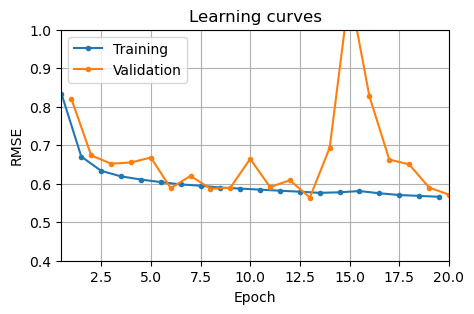

In [95]:
import matplotlib.pyplot as plt

plt.figure(figsize=[5,3])
plt.plot(np.arange(n_epochs)+0.5,history["train_metrics"],".-",label="Training")
plt.plot(np.arange(n_epochs)+1.0,history["valid_metrics"],".-",label="Validation")
plt.legend()
plt.grid()
plt.xlabel("Epoch")
plt.ylabel("RMSE")
plt.title("Learning curves")
plt.axis([0.5, 20, 0.4, 1.0])
plt.show()

## Non Sequential Models

In [97]:
class WideAndDeep(nn.Module):
    def __init__(self, n_features):
        super().__init__()
        self.deep_stack = nn.Sequential(
            nn.Linear(n_features, 50), nn.ReLU(),
            nn.Linear(50, 40), nn.ReLU(),
            nn.Linear(40, 30), nn.ReLU()
        )
        self.output_layer = nn.Linear(30 + n_features, 1)
    def forward(self, X):
        deep_output = self.deep_stack(X)
        wide_and_deep = torch.concat([X, deep_output], dim=1)
        return self.output_layer(wide_and_deep)

In [98]:
torch.manual_seed(42)
model = WideAndDeep(n_features).to(device)
learning_rate = 0.002

optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, momentum=0)
mse = nn.MSELoss()
rmse = torchmetrics.MeanSquaredError(squared=False).to(device)
history2 = train2(model, optimizer, mse, rmse, train_loader, valid_loader, n_epochs)

Epoch:1/20, Train Loss: 1.7802, Train Metric: 1.3344, Valid Metric: 0.8690
Epoch:2/20, Train Loss: 0.6249, Train Metric: 0.7904, Valid Metric: 0.7510
Epoch:3/20, Train Loss: 0.5871, Train Metric: 0.7662, Valid Metric: 0.7700
Epoch:4/20, Train Loss: 0.5588, Train Metric: 0.7474, Valid Metric: 0.9214
Epoch:5/20, Train Loss: 0.5417, Train Metric: 0.7361, Valid Metric: 0.8350
Epoch:6/20, Train Loss: 0.5265, Train Metric: 0.7256, Valid Metric: 0.8802
Epoch:7/20, Train Loss: 0.5083, Train Metric: 0.7130, Valid Metric: 0.6872
Epoch:8/20, Train Loss: 0.4904, Train Metric: 0.7003, Valid Metric: 0.8507
Epoch:9/20, Train Loss: 0.4822, Train Metric: 0.6943, Valid Metric: 0.6894
Epoch:10/20, Train Loss: 0.4681, Train Metric: 0.6843, Valid Metric: 0.7573
Epoch:11/20, Train Loss: 0.4545, Train Metric: 0.6741, Valid Metric: 0.6933
Epoch:12/20, Train Loss: 0.4447, Train Metric: 0.6670, Valid Metric: 0.6389
Epoch:13/20, Train Loss: 0.4331, Train Metric: 0.6581, Valid Metric: 0.6537
Epoch:14/20, Train Lo

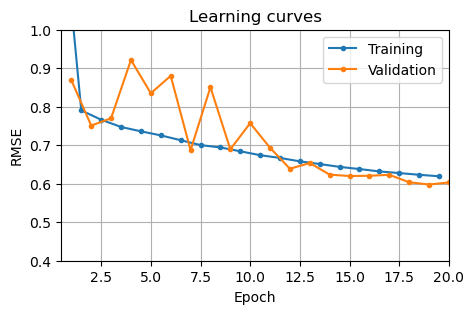

In [100]:
plt.figure(figsize=[5,3])
plt.plot(np.arange(n_epochs)+0.5,history2["train_metrics"],".-",label="Training")
plt.plot(np.arange(n_epochs)+1.0,history2["valid_metrics"],".-",label="Validation")
plt.legend()
plt.grid()
plt.xlabel("Epoch")
plt.ylabel("RMSE")
plt.title("Learning curves")
plt.axis([0.5, 20, 0.4, 1.0])
plt.show()

In [102]:
class WideAndDeepV2(nn.Module):
    def __init__(self, n_features):
        super().__init__()
        self.deep_stack = nn.Sequential(
            nn.Linear(n_features - 2, 50), nn.ReLU(),
            nn.Linear(50, 40), nn.ReLU(),
            nn.Linear(40, 30), nn.ReLU()
        )
        self.output = nn.Linear(30 + 5, 1)
    def forward(self, X):
        wide_X = X[:,:5]
        deep_X = X[:,2:]
        deep_output = self.deep_stack(deep_X)
        wide_and_deep = torch.concat([wide_X, deep_output], dim=1)
        return self.output(wide_and_deep)

In [104]:
torch.manual_seed(42)
model = WideAndDeepV2(n_features).to(device)

learning_rate = 0.002
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, momentum=0)
mse = nn.MSELoss()
rmse = torchmetrics.MeanSquaredError(squared=False).to(device)

history = train2(model, optimizer, mse, rmse, train_loader, valid_loader, n_epochs)

Epoch:1/20, Train Loss: 1.8482, Train Metric: 1.3598, Valid Metric: 0.9100
Epoch:2/20, Train Loss: 0.6281, Train Metric: 0.7925, Valid Metric: 0.8039
Epoch:3/20, Train Loss: 0.5769, Train Metric: 0.7595, Valid Metric: 0.7621
Epoch:4/20, Train Loss: 0.5415, Train Metric: 0.7360, Valid Metric: 0.7289
Epoch:5/20, Train Loss: 0.5100, Train Metric: 0.7142, Valid Metric: 0.7025
Epoch:6/20, Train Loss: 0.4844, Train Metric: 0.6960, Valid Metric: 0.6818
Epoch:7/20, Train Loss: 0.4654, Train Metric: 0.6822, Valid Metric: 0.6681
Epoch:8/20, Train Loss: 0.4527, Train Metric: 0.6728, Valid Metric: 0.6583
Epoch:9/20, Train Loss: 0.4442, Train Metric: 0.6665, Valid Metric: 0.6533
Epoch:10/20, Train Loss: 0.4375, Train Metric: 0.6614, Valid Metric: 0.6496
Epoch:11/20, Train Loss: 0.4327, Train Metric: 0.6578, Valid Metric: 0.6486
Epoch:12/20, Train Loss: 0.4283, Train Metric: 0.6545, Valid Metric: 0.6459
Epoch:13/20, Train Loss: 0.4253, Train Metric: 0.6523, Valid Metric: 0.6450
Epoch:14/20, Train Lo

## Models With Multiple Inputs

In [105]:
class WideAndDeepV3(nn.Module):
    def __init__(self, n_features):
        super().__init__()
        self.deep_stack = nn.Sequential(
            nn.Linear(n_features - 2, 50), nn.ReLU(),
            nn.Linear(50, 40), nn.ReLU(),
            nn.Linear(40, 30), nn.ReLU(),
        )
        self.output = nn.Linear(30 + 5, 1)
        
    def forward(self, X_wide, X_deep):
        deep_output = self.deep_stack(X_deep)
        wide_and_deep = torch.concat([X_wide, deep_output], dim=1)
        return self.output(wide_and_deep)

In [106]:
torch.manual_seed(42)
train_data_wd = TensorDataset(X_train[:,:5], X_train[:,2:], y_train)
train_loader = DataLoader(train_data_wd, batch_size=32, shuffle=True)
valid_data_wd = TensorDataset(X_valid[:,:5], X_valid[:,2:], y_valid)
valid_loader = DataLoader(valid_data_wd, batch_size=32, shuffle=True)

In [110]:
def evaluate_multi_in(model, data_loader, metric):
    model.eval()
    metric.reset()
    with torch.no_grad():
        for X_batch_wide, X_batch_deep, y_batch in data_loader:
            X_batch_wide, X_batch_deep = X_batch_wide.to(device), X_batch_deep.to(device)
            y_batch = y_batch.to(device)
            y_pred = model(X_batch_wide, X_batch_deep)
            metric.update(y_pred, y_batch)
    return metric.compute()

def train_multi_in(model, optimizer, criterion, metric, train_loader, valid_loader, n_epochs):
    history = {"train_losses":[],"train_metrics":[],"valid_metrics":[]}
    for epoch in range(n_epochs):
        total_loss = 0
        metric.reset()
        for *X_batch_inputs, y_batch in train_loader:
            model.train()
            X_batch_inputs = [X.to(device) for X in X_batch_inputs]
            y_batch = y_batch.to(device)
            y_pred = model(*X_batch_inputs)
            loss = criterion(y_pred, y_batch)
            total_loss += loss
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
            metric.update(y_pred, y_batch)
        mean_loss = total_loss / len(train_loader)
        history["train_losses"].append(mean_loss)
        history["train_metrics"].append(metric.compute().item())
        history["valid_metrics"].append(
            evaluate_multi_in(model, valid_loader, metric).item()
        )
        print(f"Epoch:{epoch+1}/{n_epochs}, "
             f"Train Loss: {history['train_losses'][-1]:.4f}, "
             f"Train Metric: {history['train_metrics'][-1]:.4f}, "
             f"Valid Metric: {history['valid_metrics'][-1]:.4f}")
    return history

torch.manual_seed(42)
learning_rate = 0.01
model = WideAndDeepV3(n_features).to(device)
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, momentum=0)
mse = nn.MSELoss()
rmse = torchmetrics.MeanSquaredError(squared=False).to(device)
history = train_multi_in(model, optimizer, mse, rmse, train_loader, valid_loader, n_epochs)
        

Epoch:1/20, Train Loss: 0.8366, Train Metric: 0.9148, Valid Metric: 0.6892
Epoch:2/20, Train Loss: 0.4657, Train Metric: 0.6825, Valid Metric: 0.6478
Epoch:3/20, Train Loss: 0.4312, Train Metric: 0.6567, Valid Metric: 0.6474
Epoch:4/20, Train Loss: 0.4215, Train Metric: 0.6494, Valid Metric: 0.6339
Epoch:5/20, Train Loss: 0.4110, Train Metric: 0.6411, Valid Metric: 0.6388
Epoch:6/20, Train Loss: 0.4043, Train Metric: 0.6359, Valid Metric: 0.6320
Epoch:7/20, Train Loss: 0.4004, Train Metric: 0.6324, Valid Metric: 0.7613
Epoch:8/20, Train Loss: 0.4021, Train Metric: 0.6341, Valid Metric: 0.6065
Epoch:9/20, Train Loss: 0.3883, Train Metric: 0.6232, Valid Metric: 0.6023
Epoch:10/20, Train Loss: 0.3797, Train Metric: 0.6161, Valid Metric: 0.6112
Epoch:11/20, Train Loss: 0.3744, Train Metric: 0.6118, Valid Metric: 0.5965
Epoch:12/20, Train Loss: 0.3714, Train Metric: 0.6095, Valid Metric: 0.5903
Epoch:13/20, Train Loss: 0.3696, Train Metric: 0.6081, Valid Metric: 0.5807
Epoch:14/20, Train Lo

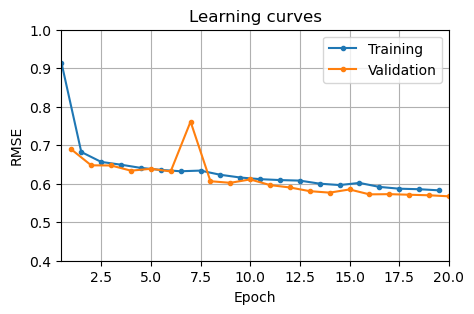

In [111]:
plt.figure(figsize=[5,3])
plt.plot(np.arange(n_epochs)+0.5,history["train_metrics"],".-",label="Training")
plt.plot(np.arange(n_epochs)+1.0,history["valid_metrics"],".-",label="Validation")
plt.legend()
plt.grid()
plt.xlabel("Epoch")
plt.ylabel("RMSE")
plt.title("Learning curves")
plt.axis([0.5, 20, 0.4, 1.0])
plt.show()

In [112]:
class WideAndDeepDataset(torch.utils.data.Dataset):
    def __init__(self, X_wide, X_deep, y):
        self.X_wide = X_wide
        self.X_deep = X_deep
        self.y = y
        
    def __len__(self):
        return len(self.y)
        
    def __getitem__(self, idx):
        input_dict = {"X_wide":self.X_wide[idx],"X_deep":self.X_deep[idx]}
        return input_dict, self.y[idx]

In [113]:
torch.manual_seed(42)
train_data_named = WideAndDeepDataset(
    X_wide=X_train[:,:5], X_deep=X_train[:,2:], y=y_train)
train_loader = DataLoader(train_data_named, batch_size=32, shuffle=True)
valid_data_named = WideAndDeepDataset(
    X_wide=X_valid[:,:5], X_deep=X_valid[:,2:], y=y_valid)
valid_loader = DataLoader(valid_data_named, batch_size=32, shuffle=True)

In [114]:
def evaluate_named(model, data_loader, metric):
    model.eval()
    metric.reset()
    with torch.no_grad():
        for inputs, y_batch in data_loader:
            inputs = {name:X.to(device) for name, X in inputs.items()}
            y_batch = y_batch.to(device)
            y_pred = model(**inputs)
            metric.update(y_pred, y_batch)
    return metric.compute()

def train_named(model, optimizer, criterion, metric, train_loader, valid_loader, n_epochs):
    history =  {"train_losses":[],"train_metrics":[],"valid_metrics":[]}
    for epoch in range(n_epochs):
        total_loss = 0
        metric.reset()
        for inputs, y_batch in train_loader:
            model.train()
            inputs = {name:X.to(device) for name, X in inputs.items()}
            y_batch = y_batch.to(device)
            y_pred = model(**inputs)
            loss = criterion(y_pred, y_batch)
            total_loss += loss.item()
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
            metric.update(y_pred, y_batch)
        mean_loss = total_loss / len(train_loader)
        history["train_losses"].append(mean_loss)
        history["train_metrics"].append(metric.compute().item())
        history["valid_metrics"].append(
            evaluate_named(model, valid_loader, metric).item())
        print(f"Epoch:{epoch+1}/{n_epochs}, "
             f"Train Loss: {history['train_losses'][-1]:.4f}, "
             f"Train Metric: {history['train_metrics'][-1]:.4f}, "
             f"Valid Metric: {history['valid_metrics'][-1]:.4f}")
    return history
        
torch.manual_seed(42)
model = WideAndDeepV3(n_features).to(device)
learning_rate = 0.01
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, momentum=0)
mse = nn.MSELoss()
rmse = torchmetrics.MeanSquaredError(squared=False).to(device)

history = train_named(model, optimizer, mse, rmse, train_loader, valid_loader, n_epochs)

Epoch:1/20, Train Loss: 0.8366, Train Metric: 0.9148, Valid Metric: 0.6892
Epoch:2/20, Train Loss: 0.4657, Train Metric: 0.6825, Valid Metric: 0.6478
Epoch:3/20, Train Loss: 0.4312, Train Metric: 0.6567, Valid Metric: 0.6474
Epoch:4/20, Train Loss: 0.4215, Train Metric: 0.6494, Valid Metric: 0.6339
Epoch:5/20, Train Loss: 0.4110, Train Metric: 0.6411, Valid Metric: 0.6388
Epoch:6/20, Train Loss: 0.4043, Train Metric: 0.6359, Valid Metric: 0.6320
Epoch:7/20, Train Loss: 0.4004, Train Metric: 0.6324, Valid Metric: 0.7613
Epoch:8/20, Train Loss: 0.4021, Train Metric: 0.6341, Valid Metric: 0.6065
Epoch:9/20, Train Loss: 0.3883, Train Metric: 0.6232, Valid Metric: 0.6023
Epoch:10/20, Train Loss: 0.3797, Train Metric: 0.6161, Valid Metric: 0.6112
Epoch:11/20, Train Loss: 0.3744, Train Metric: 0.6118, Valid Metric: 0.5965
Epoch:12/20, Train Loss: 0.3714, Train Metric: 0.6095, Valid Metric: 0.5903
Epoch:13/20, Train Loss: 0.3696, Train Metric: 0.6081, Valid Metric: 0.5807
Epoch:14/20, Train Lo

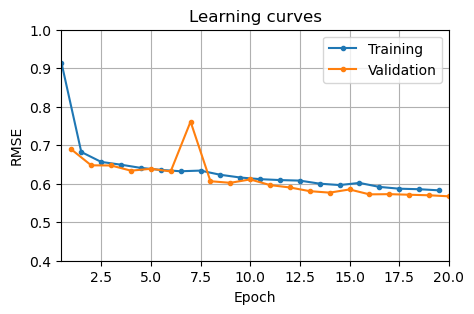

In [115]:
plt.figure(figsize=[5,3])
plt.plot(np.arange(n_epochs)+0.5,history["train_metrics"],".-",label="Training")
plt.plot(np.arange(n_epochs)+1.0,history["valid_metrics"],".-",label="Validation")
plt.legend()
plt.grid()
plt.xlabel("Epoch")
plt.ylabel("RMSE")
plt.title("Learning curves")
plt.axis([0.5, 20, 0.4, 1.0])
plt.show()

## Models With Multiple Outputs

In [116]:
class WideAndDeepV4(nn.Module):
    def __init__(self, n_features):
        super().__init__()
        self.deep_stack = nn.Sequential(
            nn.Linear(n_features - 2, 50), nn.ReLU(),
            nn.Linear(50, 40), nn.ReLU(),
            nn.Linear(40, 30), nn.ReLU()
        )
        self.output_layer = nn.Linear(30 + 5, 1)
        self.aux_output_layer = nn.Linear(30, 1)

    def forward(self, X_wide, X_deep):
        deep_output = self.deep_stack(X_deep)
        deep_and_wide = torch.concat([X_wide, deep_output], dim=1)
        main_output = self.output_layer(deep_and_wide)
        aux_output = self.aux_output_layer(deep_output)
        return main_output, aux_output

In [118]:
def evaluate_multi_out(model, data_loader, metric):
    model.eval()
    metric.reset()
    with torch.no_grad():
        for inputs, y_batch in data_loader:
            inputs = {name:X.to(device) for name, X in inputs.items()}
            y_batch = y_batch.to(device)
            y_pred, _ = model(**inputs)
            metric.update(y_pred, y_batch)
    return metric.compute()

def train_multi_out(model, optimizer, criterion, metric, train_loader, valid_loader, n_epochs):
    history = {"train_losses":[],"train_metrics":[],"valid_metrics":[]}
    for epoch in range(n_epochs):
        total_loss = 0
        metric.reset()
        for inputs, y_batch in train_loader:
            model.train()
            inputs = {name:X.to(device) for name, X in inputs.items()}
            y_batch = y_batch.to(device)
            y_pred, y_pred_aux = model(**inputs)
            main_loss = criterion(y_pred, y_batch)
            aux_loss = criterion(y_pred_aux, y_batch)
            loss = 0.8 * main_loss + 0.2 * aux_loss
            total_loss += loss.item()
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
            metric.update(y_pred, y_batch)
        mean_loss = total_loss / len(train_loader)
        history["train_losses"].append(mean_loss)
        history["train_metrics"].append(metric.compute().item())
        history["valid_metrics"].append(
            evaluate_multi_out(model, valid_loader, metric).item()
        )
        print(f"Epoch:{epoch+1}/{n_epochs}, "
             f"Train Loss: {history['train_losses'][-1]:.4f}, "
             f"Train Metric: {history['train_metrics'][-1]:.4f}, "
             f"Valid Metric: {history['valid_metrics'][-1]:.4f}")
    return history

torch.manual_seed(42)
model = WideAndDeepV4(n_features).to(device)
learning_rate = 0.01
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, momentum=0)
mse = nn.MSELoss()
rmse = torchmetrics.MeanSquaredError(squared=False).to(device)

history = train_multi_out(model, optimizer, mse, rmse, train_loader, valid_loader, n_epochs)


Epoch:1/20, Train Loss: 1.0693, Train Metric: 0.9506, Valid Metric: 0.7085
Epoch:2/20, Train Loss: 0.5709, Train Metric: 0.6860, Valid Metric: 0.6478
Epoch:3/20, Train Loss: 0.4976, Train Metric: 0.6561, Valid Metric: 0.6451
Epoch:4/20, Train Loss: 0.4688, Train Metric: 0.6494, Valid Metric: 0.6427
Epoch:5/20, Train Loss: 0.4480, Train Metric: 0.6401, Valid Metric: 0.6516
Epoch:6/20, Train Loss: 0.4393, Train Metric: 0.6361, Valid Metric: 0.6161
Epoch:7/20, Train Loss: 0.4246, Train Metric: 0.6275, Valid Metric: 0.6549
Epoch:8/20, Train Loss: 0.4247, Train Metric: 0.6298, Valid Metric: 0.6503
Epoch:9/20, Train Loss: 0.4176, Train Metric: 0.6258, Valid Metric: 0.5981
Epoch:10/20, Train Loss: 0.4030, Train Metric: 0.6149, Valid Metric: 0.6008
Epoch:11/20, Train Loss: 0.3976, Train Metric: 0.6121, Valid Metric: 0.5908
Epoch:12/20, Train Loss: 0.3894, Train Metric: 0.6065, Valid Metric: 0.5843
Epoch:13/20, Train Loss: 0.3868, Train Metric: 0.6054, Valid Metric: 0.6007
Epoch:14/20, Train Lo

In [119]:
total_params = sum(p.numel() for p in model.parameters() if p.requires_grad)
total_params

3687

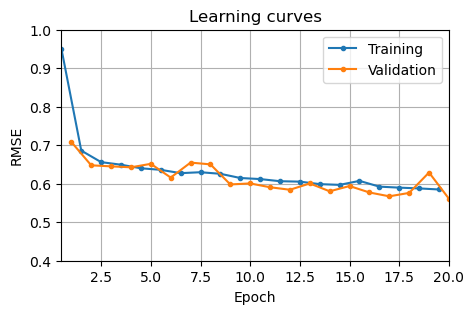

In [120]:
plt.figure(figsize=[5,3])
plt.plot(np.arange(n_epochs)+0.5,history["train_metrics"],".-",label="Training")
plt.plot(np.arange(n_epochs)+1.0,history["valid_metrics"],".-",label="Validation")
plt.legend()
plt.grid()
plt.xlabel("Epoch")
plt.ylabel("RMSE")
plt.title("Learning curves")
plt.axis([0.5, 20, 0.4, 1.0])
plt.show()

## Image Classifier with PyTorch

### Using PyTorch Vision to Load Dataset

In [125]:
import torchvision
import torchvision.transforms.v2 as T

to_tensor = T.Compose([T.ToImage(), T.ToDtype(torch.float32, scale=True)])

train_and_valid_data = torchvision.datasets.FashionMNIST(
    root="datasets", train=True, download=True, transform=to_tensor
)
test_data = torchvision.datasets.FashionMNIST(
    root="datasets", train=False, download=True, transform=to_tensor
)

train_data , valid_data = torch.utils.data.random_split(
    train_and_valid_data, [55_000, 5_000]
)

In [126]:
torch.manual_seed(42)
train_loader = DataLoader(train_data, batch_size = 32, shuffle=True)
valid_loader = DataLoader(valid_data, batch_size = 32, shuffle=True)
test_loader = DataLoader(test_data, batch_size = 32, shuffle=True)

In [127]:
X_sample, y_sample = train_data[0]

In [128]:
X_sample.shape

torch.Size([1, 28, 28])

In [129]:
X_sample.dtype

torch.float32

In [130]:
train_and_valid_data.classes

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

## Building the Classifier

In [131]:
class ImageClassifier(nn.Module):
    def __init__(self, n_inputs, n_hidden1, n_hidden2, n_classes):
        super().__init__()
        self.mlp = nn.Sequential(
            nn.Flatten(),
            nn.Linear(n_inputs, n_hidden1), nn.ReLU(),
            nn.Linear(n_hidden1, n_hidden2), nn.ReLU(),
            nn.Linear(n_hidden2, n_classes)
        )
    def forward(self, X):
        return self.mlp(X)

torch.manual_seed(42)
model = ImageClassifier(n_inputs=1 * 28 * 28, n_hidden1=300, n_hidden2=100,
                       n_classes=10).to(device)
xentropy = nn.CrossEntropyLoss()

optimizer = torch.optim.SGD(model.parameters(), lr=0.1)
accuracy = torchmetrics.Accuracy(task="multiclass", num_classes=10).to(device)
history = train2(model, optimizer, xentropy, accuracy, train_loader, valid_loader,
                n_epochs)

Epoch:1/20, Train Loss: 0.6086, Train Metric: 0.7790, Valid Metric: 0.8090
Epoch:2/20, Train Loss: 0.4054, Train Metric: 0.8515, Valid Metric: 0.8432
Epoch:3/20, Train Loss: 0.3613, Train Metric: 0.8656, Valid Metric: 0.8484
Epoch:4/20, Train Loss: 0.3321, Train Metric: 0.8752, Valid Metric: 0.8746
Epoch:5/20, Train Loss: 0.3131, Train Metric: 0.8834, Valid Metric: 0.8780
Epoch:6/20, Train Loss: 0.2970, Train Metric: 0.8887, Valid Metric: 0.8710
Epoch:7/20, Train Loss: 0.2852, Train Metric: 0.8926, Valid Metric: 0.8670
Epoch:8/20, Train Loss: 0.2704, Train Metric: 0.8987, Valid Metric: 0.8684
Epoch:9/20, Train Loss: 0.2609, Train Metric: 0.9009, Valid Metric: 0.8718
Epoch:10/20, Train Loss: 0.2525, Train Metric: 0.9036, Valid Metric: 0.8746
Epoch:11/20, Train Loss: 0.2442, Train Metric: 0.9077, Valid Metric: 0.8760
Epoch:12/20, Train Loss: 0.2360, Train Metric: 0.9101, Valid Metric: 0.8770
Epoch:13/20, Train Loss: 0.2282, Train Metric: 0.9132, Valid Metric: 0.8764
Epoch:14/20, Train Lo

In [132]:
model.eval()
torch.manual_seed(42)
X_new, y_new = next(iter(valid_loader))
X_new = X_new[:3].to(device)
with torch.no_grad():
    y_pred_logits = model(X_new)
y_pred = y_pred_logits.argmax(dim=1)
y_pred

tensor([9, 3, 6], device='mps:0')

In [133]:
y_new[:3]

tensor([9, 3, 6])

In [134]:
import torch.nn.functional as F
y_proba = F.softmax(y_pred_logits, dim=1)
y_proba.round(decimals=3)


tensor([[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         1.0000],
        [0.0000, 0.0000, 0.0000, 0.9990, 0.0000, 0.0000, 0.0010, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0020, 0.0000, 0.0440, 0.0000, 0.9550, 0.0000, 0.0000,
         0.0000]], device='mps:0')

In [135]:
if device == "mps":
    y_proba = y_proba.cpu()
y_proba.cpu().round(decimals=3)

tensor([[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         1.0000],
        [0.0000, 0.0000, 0.0000, 0.9990, 0.0000, 0.0000, 0.0010, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0020, 0.0000, 0.0440, 0.0000, 0.9550, 0.0000, 0.0000,
         0.0000]])

In [136]:
y_top4_values, y_top4_indices = torch.topk(y_pred_logits, k=4, dim=1)
y_top4_probas = F.softmax(y_top4_values, dim=1)
y_top4_probas.round(decimals=3)

tensor([[1.0000, 0.0000, 0.0000, 0.0000],
        [0.9990, 0.0010, 0.0000, 0.0000],
        [0.9550, 0.0440, 0.0020, 0.0000]], device='mps:0')

In [137]:
y_top4_indices

tensor([[9, 7, 1, 5],
        [3, 6, 4, 8],
        [6, 4, 2, 0]], device='mps:0')

In [138]:
sum(p.numel() for p in model.parameters() if p.requires_grad)

266610

## Hyperparameter Tuning using Optuna

In [141]:
import optuna

def objective(trail):
    learning_rate = trail.suggest_float("learning_rate", 1e-5, 1e-1, log=True)
    n_hidden = trail.suggest_int("n_hidden", 20, 300)
    model = ImageClassifier(n_inputs=1 * 28 * 28, n_hidden1=n_hidden,
                           n_hidden2=n_hidden, n_classes=10).to(device)
    xentropy = nn.CrossEntropyLoss()
    optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
    accuracy = torchmetrics.Accuracy(task="multiclass", num_classes=10).to(device)
    history = train2(model, optimizer, xentropy, accuracy, train_loader, 
                    valid_loader, n_epochs=10)
    validation_accuracy = max(history["valid_metrics"])
    return validation_accuracy

In [143]:
torch.manual_seed(42)
sampler = optuna.samplers.TPESampler(seed=42)
study = optuna.create_study(direction="maximize", sampler=sampler)
study.optimize(objective, n_trials=5)

[I 2025-09-09 16:47:16,831] A new study created in memory with name: no-name-96d86d8f-3e44-447f-b5f5-fd3d69a011b2


Epoch:1/10, Train Loss: 2.2769, Train Metric: 0.1469, Valid Metric: 0.1956
Epoch:2/10, Train Loss: 2.2093, Train Metric: 0.2835, Valid Metric: 0.3532
Epoch:3/10, Train Loss: 2.1164, Train Metric: 0.4107, Valid Metric: 0.4562
Epoch:4/10, Train Loss: 1.9777, Train Metric: 0.5103, Valid Metric: 0.5606
Epoch:5/10, Train Loss: 1.7872, Train Metric: 0.5786, Valid Metric: 0.6116
Epoch:6/10, Train Loss: 1.5783, Train Metric: 0.6192, Valid Metric: 0.6254
Epoch:7/10, Train Loss: 1.3989, Train Metric: 0.6291, Valid Metric: 0.6252
Epoch:8/10, Train Loss: 1.2616, Train Metric: 0.6351, Valid Metric: 0.6424
Epoch:9/10, Train Loss: 1.1584, Train Metric: 0.6457, Valid Metric: 0.6500


[I 2025-09-09 16:49:10,745] Trial 0 finished with value: 0.6574000120162964 and parameters: {'learning_rate': 0.00031489116479568613, 'n_hidden': 287}. Best is trial 0 with value: 0.6574000120162964.


Epoch:10/10, Train Loss: 1.0795, Train Metric: 0.6522, Valid Metric: 0.6574
Epoch:1/10, Train Loss: 1.1622, Train Metric: 0.6121, Valid Metric: 0.7310
Epoch:2/10, Train Loss: 0.6197, Train Metric: 0.7857, Valid Metric: 0.7934
Epoch:3/10, Train Loss: 0.5235, Train Metric: 0.8185, Valid Metric: 0.8142
Epoch:4/10, Train Loss: 0.4817, Train Metric: 0.8323, Valid Metric: 0.8254
Epoch:5/10, Train Loss: 0.4558, Train Metric: 0.8409, Valid Metric: 0.8322
Epoch:6/10, Train Loss: 0.4368, Train Metric: 0.8477, Valid Metric: 0.8430
Epoch:7/10, Train Loss: 0.4216, Train Metric: 0.8526, Valid Metric: 0.8456
Epoch:8/10, Train Loss: 0.4084, Train Metric: 0.8579, Valid Metric: 0.8428
Epoch:9/10, Train Loss: 0.3977, Train Metric: 0.8603, Valid Metric: 0.8490


[I 2025-09-09 16:51:01,768] Trial 1 finished with value: 0.8514000177383423 and parameters: {'learning_rate': 0.008471801418819975, 'n_hidden': 188}. Best is trial 1 with value: 0.8514000177383423.


Epoch:10/10, Train Loss: 0.3871, Train Metric: 0.8637, Valid Metric: 0.8514
Epoch:1/10, Train Loss: 2.2996, Train Metric: 0.0997, Valid Metric: 0.1022
Epoch:2/10, Train Loss: 2.2946, Train Metric: 0.0997, Valid Metric: 0.1024
Epoch:3/10, Train Loss: 2.2894, Train Metric: 0.0997, Valid Metric: 0.1024
Epoch:4/10, Train Loss: 2.2841, Train Metric: 0.0996, Valid Metric: 0.1024
Epoch:5/10, Train Loss: 2.2786, Train Metric: 0.0996, Valid Metric: 0.1024
Epoch:6/10, Train Loss: 2.2728, Train Metric: 0.0997, Valid Metric: 0.1026
Epoch:7/10, Train Loss: 2.2668, Train Metric: 0.1001, Valid Metric: 0.1030
Epoch:8/10, Train Loss: 2.2607, Train Metric: 0.1004, Valid Metric: 0.1036
Epoch:9/10, Train Loss: 2.2544, Train Metric: 0.1011, Valid Metric: 0.1046


[I 2025-09-09 16:52:58,685] Trial 2 finished with value: 0.10540000349283218 and parameters: {'learning_rate': 4.207988669606632e-05, 'n_hidden': 63}. Best is trial 1 with value: 0.8514000177383423.


Epoch:10/10, Train Loss: 2.2477, Train Metric: 0.1020, Valid Metric: 0.1054
Epoch:1/10, Train Loss: 2.3063, Train Metric: 0.0878, Valid Metric: 0.1094
Epoch:2/10, Train Loss: 2.3030, Train Metric: 0.1105, Valid Metric: 0.1332
Epoch:3/10, Train Loss: 2.2998, Train Metric: 0.1335, Valid Metric: 0.1508
Epoch:4/10, Train Loss: 2.2966, Train Metric: 0.1429, Valid Metric: 0.1548
Epoch:5/10, Train Loss: 2.2934, Train Metric: 0.1440, Valid Metric: 0.1530
Epoch:6/10, Train Loss: 2.2902, Train Metric: 0.1430, Valid Metric: 0.1506
Epoch:7/10, Train Loss: 2.2871, Train Metric: 0.1411, Valid Metric: 0.1482
Epoch:8/10, Train Loss: 2.2840, Train Metric: 0.1388, Valid Metric: 0.1446
Epoch:9/10, Train Loss: 2.2810, Train Metric: 0.1367, Valid Metric: 0.1412


[I 2025-09-09 16:54:55,343] Trial 3 finished with value: 0.15479999780654907 and parameters: {'learning_rate': 1.7073967431528103e-05, 'n_hidden': 263}. Best is trial 1 with value: 0.8514000177383423.


Epoch:10/10, Train Loss: 2.2779, Train Metric: 0.1346, Valid Metric: 0.1400
Epoch:1/10, Train Loss: 1.8597, Train Metric: 0.4235, Valid Metric: 0.6150
Epoch:2/10, Train Loss: 0.9838, Train Metric: 0.6643, Valid Metric: 0.6890
Epoch:3/10, Train Loss: 0.7658, Train Metric: 0.7246, Valid Metric: 0.7502
Epoch:4/10, Train Loss: 0.6741, Train Metric: 0.7643, Valid Metric: 0.7742
Epoch:5/10, Train Loss: 0.6145, Train Metric: 0.7888, Valid Metric: 0.7878
Epoch:6/10, Train Loss: 0.5726, Train Metric: 0.8046, Valid Metric: 0.8020
Epoch:7/10, Train Loss: 0.5413, Train Metric: 0.8149, Valid Metric: 0.8126
Epoch:8/10, Train Loss: 0.5176, Train Metric: 0.8221, Valid Metric: 0.8152
Epoch:9/10, Train Loss: 0.4993, Train Metric: 0.8267, Valid Metric: 0.8190


[I 2025-09-09 16:56:50,856] Trial 4 finished with value: 0.8267999887466431 and parameters: {'learning_rate': 0.002537815508265664, 'n_hidden': 218}. Best is trial 1 with value: 0.8514000177383423.


Epoch:10/10, Train Loss: 0.4853, Train Metric: 0.8319, Valid Metric: 0.8268


In [145]:
study.best_params

{'learning_rate': 0.008471801418819975, 'n_hidden': 188}

In [147]:
study.best_value

0.8514000177383423